In [1]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 29.8 MB/s 


In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [3]:
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 50
Batch_size = 128

In [4]:
train_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_train.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_test.csv")

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [6]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [8]:
# We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers

model = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function 
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [10]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [11]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
352/352 [==============================] - 13s 8ms/step - loss: 0.5081 - accuracy: 0.8187 - val_loss: 0.3702 - val_accuracy: 0.8671
Epoch 2/50
352/352 [==============================] - 2s 7ms/step - loss: 0.3345 - accuracy: 0.8821 - val_loss: 0.3098 - val_accuracy: 0.8890
Epoch 3/50
352/352 [==============================] - 2s 6ms/step - loss: 0.2850 - accuracy: 0.8966 - val_loss: 0.3308 - val_accuracy: 0.8761
Epoch 4/50
352/352 [==============================] - 2s 6ms/step - loss: 0.2567 - accuracy: 0.9078 - val_loss: 0.2850 - val_accuracy: 0.8963
Epoch 5/50
352/352 [==============================] - 2s 7ms/step - loss: 0.2306 - accuracy: 0.9170 - val_loss: 0.2776 - val_accuracy: 0.9012
Epoch 6/50
352/352 [==============================] - 2s 7ms/step - loss: 0.2120 - accuracy: 0.9228 - val_loss: 0.2837 - val_accuracy: 0.8999
Epoch 7/50
352/352 [==============================] - 2s 7ms/step - loss: 0.1917 - accuracy: 0.9297 - val_loss: 0.2516 - val_accuracy: 0.9083
Epoch

In [12]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.5729 - accuracy: 0.9180
Test loss: 0.5728814005851746
Test accuracy: 0.9179999828338623


313/313 [==============================] - 1s 3ms/step


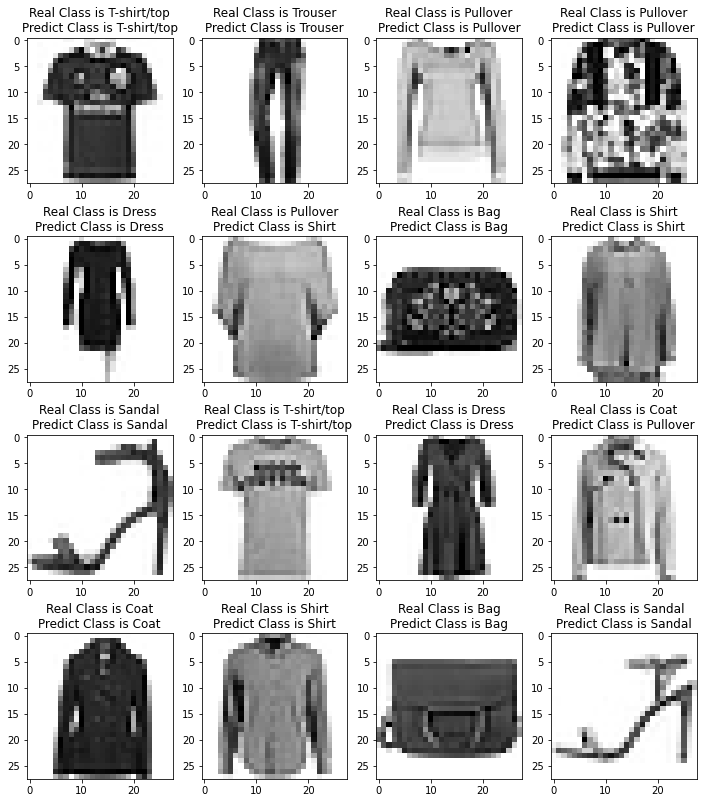

In [13]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}");